In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2022-12-01'

df = data.DataReader('AAPL', 'yahoo', start, end)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526475
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-11-25,148.880005,147.119995,148.309998,148.110001,35195900.0,148.110001
2022-11-28,146.639999,143.380005,145.139999,144.220001,69246000.0,144.220001
2022-11-29,144.809998,140.350006,144.289993,141.169998,83763800.0,141.169998
2022-11-30,148.720001,140.550003,141.399994,148.029999,111224400.0,148.029999
2022-12-01,149.130005,146.610001,148.210007,148.309998,71250400.0,148.309998


In [5]:
df = df.reset_index()

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.415357
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.515213
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.526475
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.422664
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.410792


In [7]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


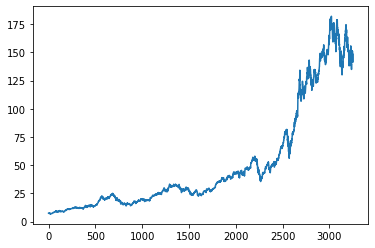

In [8]:
plt.plot(df.Close)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3248    152.959899
3249    152.938599
3250    152.879899
3251    152.911499
3252    152.935999
Name: Close, Length: 3253, dtype: float64

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3248    154.59515
3249    154.45565
3250    154.31830
3251    154.21405
3252    154.09165
Name: Close, Length: 3253, dtype: float64

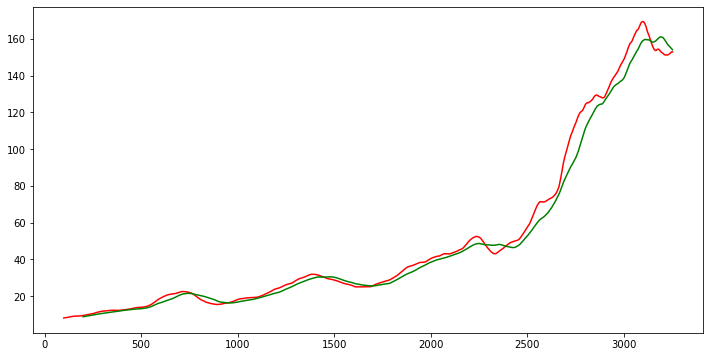

In [11]:
plt.figure(figsize = (12,6))
# plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(3253, 5)

In [13]:
#Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2277, 1)
(976, 1)


In [14]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [15]:
data_testing.head()

,Close
2277,39.205002
2278,38.325001
2279,38.480000
2280,38.174999
2281,39.439999


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)

In [18]:
data_training_array

array([[0.01304067],
       [0.01533047],
       [0.01558878],
       ...,
       [0.61394545],
       [0.62308367],
       [0.62757949]])

In [19]:
data_training_array.shape

(2277, 1)

In [20]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [21]:
x_train.shape

(2177, 100, 1)

In [22]:
#Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
               
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
               
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 60)

Epoch 1/60
69/69 [==============================] - 19s 202ms/step - loss: 0.0310
Epoch 2/60
69/69 [==============================] - 14s 197ms/step - loss: 0.0070
Epoch 3/60
69/69 [==============================] - 14s 208ms/step - loss: 0.0057
Epoch 4/60
69/69 [==============================] - 13s 190ms/step - loss: 0.0048
Epoch 5/60
69/69 [==============================] - 14s 199ms/step - loss: 0.0058
Epoch 6/60
69/69 [==============================] - 13s 189ms/step - loss: 0.0050
Epoch 7/60
69/69 [==============================] - 15s 211ms/step - loss: 0.0042
Epoch 8/60
69/69 [==============================] - 14s 207ms/step - loss: 0.0043
Epoch 9/60
69/69 [==============================] - 14s 202ms/step - loss: 0.0040
Epoch 10/60
69/69 [==============================] - 13s 194ms/step - loss: 0.0037
Epoch 11/60
69/69 [==============================] - 14s 198ms/step - loss: 0.0037
Epoch 12/60
69/69 [==============================] - 14s 199ms/step - loss: 0.0033
Epoch 13/60
6

In [1]:
model.save('keras_model.h5')

NameError: name 'model' is not defined

In [27]:
data_testing.head()

,Close
2277,39.205002
2278,38.325001
2279,38.480000
2280,38.174999
2281,39.439999


In [28]:
data_testing.head(100)

,Close
2277,39.205002
2278,38.325001
2279,38.480000
2280,38.174999
2281,39.439999
...,...
2372,46.305000
2373,47.537498
2374,48.145000
2375,48.702499


In [29]:
past_100_days = data_training.tail(100)

In [30]:
final_df = past_100_days.append(data_testing, ignore_index=True)

In [31]:
final_df.head()

,Close
0,54.040001
1,54.485001
2,54.924999
3,55.744999
4,56.257500


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.126261  ],
       [0.12929931],
       [0.13230349],
       ...,
       [0.72115731],
       [0.76799524],
       [0.76990698]])

In [33]:
input_data.shape

(1076, 1)

In [34]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [35]:
print(x_test.shape)
print(y_test.shape)

(976, 100, 1)
(976,)


In [36]:
#Making Prediction

y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 71ms/step


In [37]:
y_predicted.shape

(976, 1)

In [38]:
y_test

array([0.02497227, 0.0189639 , 0.02002218, 0.01793974, 0.02657676,
       0.02408467, 0.02131943, 0.03936161, 0.04139285, 0.04152941,
       0.04960314, 0.05460441, 0.05470684, 0.049074  , 0.04816933,
       0.04649653, 0.04898865, 0.04777672, 0.04883503, 0.04818639,
       0.04905691, 0.05093454, 0.04927882, 0.05253905, 0.05468976,
       0.05486046, 0.05578219, 0.05284628, 0.05595289, 0.05745499,
       0.05690876, 0.05518478, 0.05173679, 0.05243663, 0.06266108,
       0.06609201, 0.06745755, 0.07090551, 0.07498506, 0.07822822,
       0.0756849 , 0.07846719, 0.09029614, 0.08340019, 0.07945721,
       0.07612869, 0.07899633, 0.07942306, 0.08152257, 0.08372451,
       0.08846975, 0.09073996, 0.09132031, 0.09355637, 0.09884784,
       0.09782367, 0.09973542, 0.09688486, 0.09674831, 0.0973628 ,
       0.09739694, 0.10401981, 0.10526585, 0.10640949, 0.1114449 ,
       0.1108987 , 0.10768968, 0.1060169 , 0.10654605, 0.09982077,
       0.11663396, 0.11429546, 0.11873346, 0.11315182, 0.10355

In [39]:
y_predicted

array([[0.11313047],
       [0.1129016 ],
       [0.11276504],
       [0.11269134],
       [0.11266105],
       [0.1126661 ],
       [0.11271653],
       [0.11279592],
       [0.11292145],
       [0.11314714],
       [0.11348879],
       [0.11396578],
       [0.11460727],
       [0.11542173],
       [0.11637995],
       [0.11743021],
       [0.11852033],
       [0.11960767],
       [0.12065823],
       [0.12164453],
       [0.12254772],
       [0.12335737],
       [0.12407753],
       [0.12471065],
       [0.12527   ],
       [0.1257804 ],
       [0.12626112],
       [0.12672698],
       [0.12717591],
       [0.1276117 ],
       [0.12804571],
       [0.12848078],
       [0.12890759],
       [0.12930186],
       [0.12964627],
       [0.12997401],
       [0.13033219],
       [0.13075283],
       [0.13126378],
       [0.13189265],
       [0.1326611 ],
       [0.13355757],
       [0.13456511],
       [0.1357145 ],
       [0.13695702],
       [0.1382449 ],
       [0.13951138],
       [0.140

In [40]:
scaler.scale_

array([0.00682769])

In [41]:
scale_factor = 1/0.00682769
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

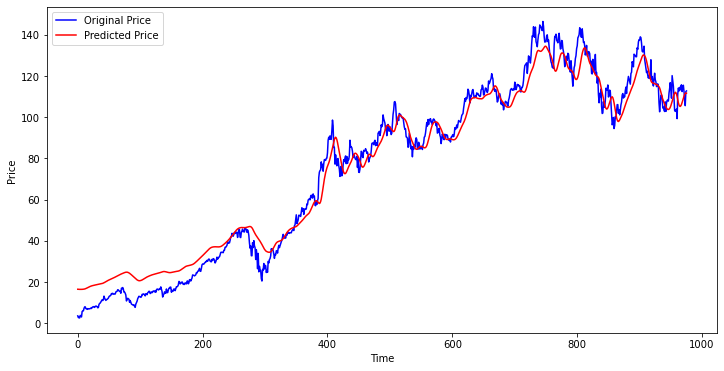

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [2]:
model.score


NameError: name 'model' is not defined